# Visualizaciones en Python
Deberás entregar el segundo avance de tu proyecto final. Elegirás uno de los datasets del desafío “Elección de Potenciales Datasets e importe con la librería Pandas”. Posteriormente, crearás un notebook donde cargaran el archivo utilizando funciones de pandas para luego proceder a realizar 3 gráficos diferentes con Matplotlib y 3 con Seaborn. Finalmente, cada gráfico será interpretado con el fin de obtener insights relevantes que permitan dar respuesta a la pregunta problema.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/AdultIncome.csv"

In [3]:
adult_income = pd.read_csv(url)

In [4]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
age_max = adult_income["age"].max()
age_min = adult_income["age"].min()
ages = range(age_min,age_max+1)

In [87]:
all_capital_mean_gain = []
male_capital_mean_gain = []
female_capital_mean_gain = []
for i in ages:
    adult_income_same_age = adult_income[adult_income["age"]==i]
    mask_male   = adult_income_same_age["sex"].str.contains("Male")
    mask_female = adult_income_same_age["sex"].str.contains("Female")
    male_capital_mean_gain.append  (adult_income_same_age[mask_male     ]["capital-gain"].mean())
    female_capital_mean_gain.append(adult_income_same_age[mask_female   ]["capital-gain"].mean())
    all_capital_mean_gain.append   (adult_income_same_age["capital-gain"].mean())
    
all_capital_mean_gain    = np.array(all_capital_mean_gain   )
male_capital_mean_gain   = np.array(male_capital_mean_gain  )
female_capital_mean_gain = np.array(female_capital_mean_gain)

In [89]:
male_capital_education   = []
female_capital_education = []
for i in ages:
    adult_income_same_age = adult_income[adult_income["age"]==i]
    mask_male   = adult_income_same_age["sex"].str.contains("Male")
    mask_female = adult_income_same_age["sex"].str.contains("Female")
    male_capital_education.append  (adult_income_same_age[mask_male     ]["education-num"].mean())
    female_capital_education.append(adult_income_same_age[mask_female   ]["education-num"].mean())
    
male_capital_education   = np.array(male_capital_education  )
female_capital_education = np.array(female_capital_education)


In [86]:
all_capital_mean_work_hrs    = []
male_capital_mean_work_hrs   = []
female_capital_mean_work_hrs = []
for i in ages:
    adult_income_same_age = adult_income[adult_income["age"]==i]
    mask_male   = adult_income_same_age["sex"].str.contains("Male")
    mask_female = adult_income_same_age["sex"].str.contains("Female")
    male_capital_mean_work_hrs.append  (adult_income_same_age[mask_male     ]["hours-per-week"].mean())
    female_capital_mean_work_hrs.append(adult_income_same_age[mask_female   ]["hours-per-week"].mean())
    all_capital_mean_work_hrs.append   (adult_income_same_age["hours-per-week"].mean())
    
male_capital_mean_work_hrs   = np.array(male_capital_mean_work_hrs  )
female_capital_mean_work_hrs = np.array(female_capital_mean_work_hrs)
all_capital_mean_work_hrs    = np.array(all_capital_mean_work_hrs   )

Text(0.5, 0.98, 'Adult income capital gain analysis')

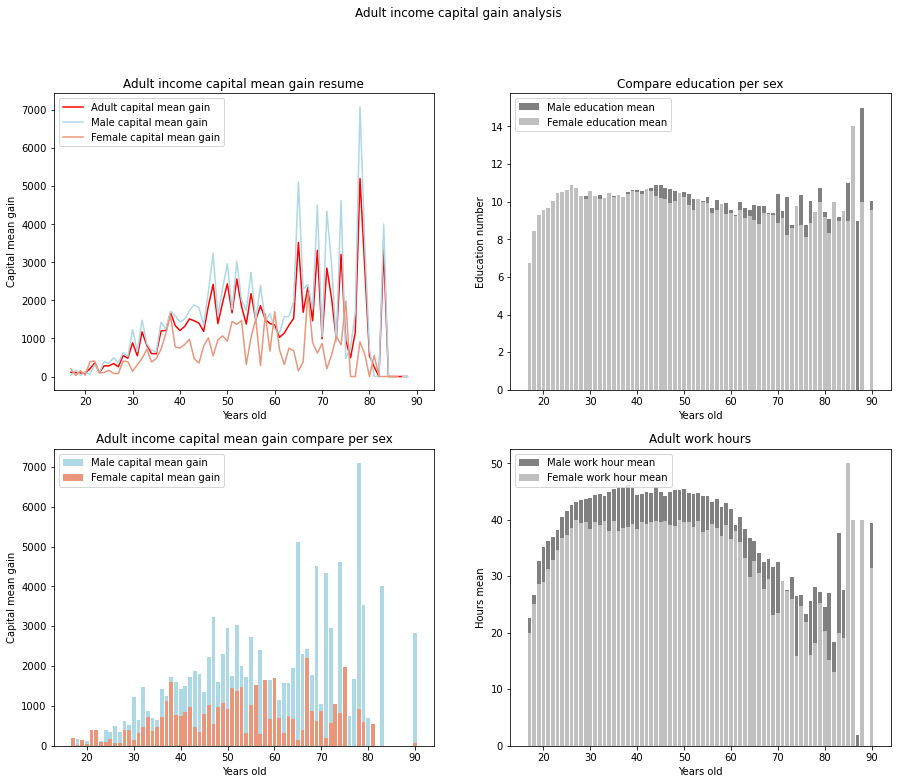

In [90]:
ages = np.array(ages)
fig, axs = plt.subplots(2,2,figsize=(15, 12))
axs[0,0].plot(ages, all_capital_mean_gain   , c='r'         , label='Adult capital mean gain' )
axs[0,0].plot(ages, male_capital_mean_gain  , c='lightblue' , label='Male capital mean gain'  )
axs[0,0].plot(ages, female_capital_mean_gain, c='darksalmon', label='Female capital mean gain')
axs[0,0].set_xlabel('Years old')                  
axs[0,0].set_ylabel('Capital mean gain')
axs[0,0].set_title('Adult income capital mean gain resume')
axs[0,0].legend(loc="upper left") 

axs[0,1].bar(ages, male_capital_education  ,color='gray'  ,label='Male education mean'  )
axs[0,1].bar(ages, female_capital_education,color='silver',label='Female education mean')
axs[0,1].set_xlabel('Years old')                  
axs[0,1].set_ylabel('Education number')
axs[0,1].set_title('Compare education per sex')
axs[0,1].legend(loc="upper left") 

axs[1,0].bar(ages, male_capital_mean_gain  ,color='lightblue' ,label='Male capital mean gain'  )
axs[1,0].bar(ages, female_capital_mean_gain,color='darksalmon',label='Female capital mean gain')
axs[1,0].set_xlabel('Years old')                  
axs[1,0].set_ylabel('Capital mean gain')
axs[1,0].set_title('Adult income capital mean gain compare per sex')
axs[1,0].legend(loc="upper left") 


axs[1,1].bar(ages, male_capital_mean_work_hrs  ,color='gray'  ,label='Male work hour mean'  )
axs[1,1].bar(ages, female_capital_mean_work_hrs,color='silver',label='Female work hour mean')
axs[1,1].set_xlabel('Years old')                  
axs[1,1].set_ylabel('Hours mean')
axs[1,1].set_title('Adult work hours')
axs[1,1].legend(loc="upper left") 


fig.suptitle('Adult income capital gain analysis')